In [292]:
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [12]:
os.listdir()

['.ipynb_checkpoints',
 'python_language_1_data.csv',
 'python_language_1_example_data.json',
 'Question 1.ipynb']

## Part 1 a)

In [86]:
def generate_json (file_name, init_year=1980,end_year=2018, return_data = False):
    data = np.genfromtxt(file_name, delimiter=',', names =True)
    
    tot_data={}

    while init_year <= end_year:
        rainfall_per_day = {}
        for row in data:
            if row[0] == init_year:
                day = int(row[1])
                rainfall = float(row[2])
                rainfall_per_day[day]=rainfall
        tot_data[int(init_year)]=rainfall_per_day
        init_year += 1
        
    with open('new_file.json', 'w') as file:
        json.dump(tot_data, file,  indent=4)
    if return_data == True:
        return tot_data

In [102]:
generate_json ('python_language_1_data.csv', init_year=1980,end_year=2018)

## Part 1 b)

In [157]:
def plot_rainfall(file_name, year, line_colour):
    with open(file_name, 'r') as f:
        mydataasstring = f.read()
    mydata = json.loads(mydataasstring)
    x_values=[]
    y_values=[]
    for days,rainfall in mydata[year].items():
        x_values.append(int(days)) #makes sure the x-axis is neater - better to specify data-type
        y_values.append(float(rainfall))
    plt.plot(x_values,y_values,line_colour)
    plt.ylabel('Rainfall (mm/day)')
    plt.xlabel('Day')
    plt.title('Daily rainfall measurement in 1998')
    plt.savefig('Daily Rainfall.png')

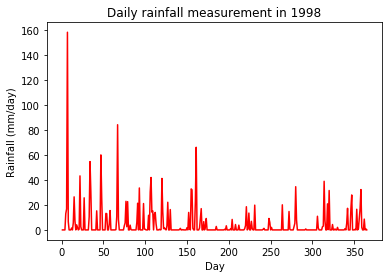

In [158]:
plot_rainfall('new_file.json','1998','r')

## Part 1 c)

My solution

In [262]:
def mean_annual_rainfall(file_name, init_year = 1988, end_year = 2000):   
    with open(file_name, 'r') as f:
        mydataasstring = f.read()
    mydata = json.loads(mydataasstring)
    start_year=init_year
    final_year=end_year
    
    mean_rainfall=[]
    tot_data={}


    x_values=[]
    


    while init_year <= end_year:
        y_values=[]

        for days,rainfall in mydata[str(init_year)].items():
            y_values.append(float(rainfall))
        mean_rainfall.append(np.sum(y_values)/len(y_values))


        x_values.append(int(init_year))

        #print(len(y_values))

        init_year +=1

    plt.plot(x_values,mean_rainfall,'ro-')
    plt.ylabel('Rainfall (mm/day)')
    plt.xlabel('Day')
    plt.title('Mean rainfall measurement from {0} - {1}'. format(start_year,final_year))
    plt.savefig('Daily Rainfall.png')



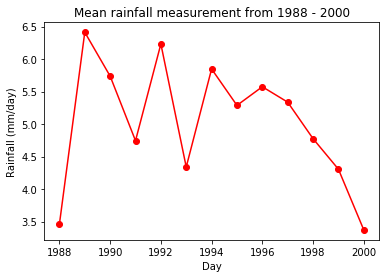

In [263]:
mean_annual_rainfall('new_file.json',1988,2000)

Jack's solution

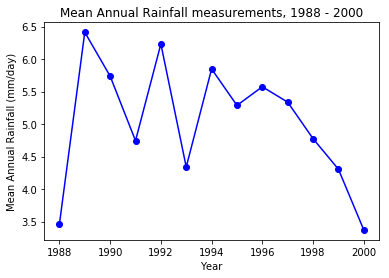

In [234]:
def plotAnnualRainfall(jsonFile, startyear, endyear):
    """
    Function to plot the mean annual rainfall each year from startyear to endyear
    :param jsonFile: file containing data as json
    :param startyear: first year in range of plotting mean annual rainfall
    :param endyear: last year in range of plotting mean annual rainfall
    :return:
    """
    istartyear = int(startyear)  # convert startyear and endyear to int
    iendyear = int(endyear)
    file = open(jsonFile, 'r')
    data_as_string = file.read()  # data in jsonFile in str form
    py_data_object = json.loads(data_as_string)  # convert to dict object

        
    xpoints = []
    ypoints = []  # lists to be plotted
    while istartyear <= iendyear:
        rainfall_data = py_data_object[str(istartyear)]  # get rainfall data for specific year
        tot_rainfall = 0
        for day, rainfall in rainfall_data.items():
            tot_rainfall += float(rainfall)  # getting total rainfall
        mean_rainfall = tot_rainfall/len(rainfall_data.items())
        ypoints.append(mean_rainfall)
        xpoints.append(int(istartyear))
        istartyear+=1
    plt.plot(xpoints, ypoints, 'bo-')
    plt.ylabel('Mean Annual Rainfall (mm/day)')
    plt.xlabel('Year')
    plt.title('Mean Annual Rainfall measurements, {0} - {1}'.format(startyear, endyear))
    #plt.savefig('Rainfall_plot_1988_2000.png')
    #plt.clf() ##clears the plot! doesn't plot on jupyter


plotAnnualRainfall('new_file.json', '1988', '2000')

Comparison below. Mine first then Jack's

In [244]:
mean_rainfall=[]
y_values =[]
for days,rainfall in mydata[str(2000)].items():
        y_values.append(float(rainfall))
mean_rainfall.append(np.sum(y_values)/len(y_values))
#print(y_values)
print(len(y_values))
mean_rainfall

366


[3.372650273224044]

In [252]:
init_year = 1988
end_year = 2000
mean_rainfall=[]
tot_data={}


x_values=[]


while init_year <= end_year:
    y_values=[] #previous mistake the y value was outside the while loop, wrong! the rainfall is different for each year! 
    for days,rainfall in mydata[str(init_year)].items():
        y_values.append(float(rainfall))
    x_values.append(int(init_year))
    mean_rainfall.append(np.sum(y_values)/len(y_values))
    init_year +=1
print(x_values)
mean_rainfall

[1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]


[3.4623114754098365,
 6.414021917808219,
 5.738312328767123,
 4.745276712328766,
 6.233409836065573,
 4.340964383561644,
 5.848958904109589,
 5.288767123287672,
 5.575437158469946,
 5.338219178082191,
 4.776465753424658,
 4.3067671232876705,
 3.372650273224044]

In [236]:
istartyear = 1988
iendyear = 2000



xpoints = []
ypoints = [] 

while istartyear <= iendyear:
    rainfall_data = mydata[str(istartyear)]  # get rainfall data for specific year
    tot_rainfall = 0
    for day, rainfall in rainfall_data.items():
        tot_rainfall += float(rainfall)  # getting total rainfall
    mean_rainfall = tot_rainfall/len(rainfall_data.items())
    ypoints.append(mean_rainfall)
    xpoints.append(int(istartyear))
    istartyear+=1

print(xpoints)
print(ypoints)

[1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]
[3.4623114754098347, 6.414021917808218, 5.738312328767122, 4.7452767123287645, 6.233409836065576, 4.340964383561643, 5.848958904109588, 5.288767123287668, 5.575437158469942, 5.338219178082186, 4.776465753424654, 4.30676712328767, 3.3726502732240413]


## Part 1 d)

### Using for loop

In [326]:
def correction_for_loop(file_name,year=2000 ):
    with open(file_name, 'r') as f:
        mydataasstring = f.read()
    mydata = json.loads(mydataasstring)

    corrected_values=[]


    for days,rainfall in mydata[str(year)].items():
        new_value = rainfall*(1.2**(np.sqrt(2)))

        corrected_values.append((new_value))
    return(corrected_values)  

### Using comprehension

In [324]:
def correction_using_comprehension(file_name,year=2000 ):
    with open(file_name, 'r') as f:
        mydataasstring = f.read()
    mydata = json.loads(mydataasstring)
    


    return[rainfall*(1.2**(np.sqrt(2))) for days,rainfall in mydata[str(year)].items()]
        

In [328]:
correction_for_loop('new_file.json',2000 ) == correction_using_comprehension('new_file.json',2000 )

True

Advantages of using comprehension - achieves the same output in less lines of
                                        code, faster in terms of performance.
Disadvantages of using comprehension - more confusing since harder to read

Advantages of using loop - Perhaps easier to understand
Disadvantage of using loop - takes more lines of code, slower in terms of performance.

 Need to add this under every function!!!!
 
    """
    Function that parses the data in a file and returns it as a dictionary.
    :param fileName: name of File containing original data
    :param startyear: first year in data set
    :param endyear: last year in data set
    :return:  tot_data: dictionary where key= 'year' (int), value = dict > key = 'day' (int), value='rainfall' (float)
    """
